* データマイニング特別演習 演習テーマ３ - yolov8による物体検出(サンプルデータの学習) -

1. google colaboratory のノートブックを開く<br>
(ランタイムのハードウェアアクセラレータをGPUに変更すると短時間で実行可能)
2. ねじ データを解凍して展開
3. 作成済みの作業環境に移動、YOLOv8 のモデルを利用し、ねじデータを学習
4. テスト画像を使って、学習したモデルを検証

In [1]:
# 2. googleドライブに接続し、作成した学習データを解凍・展開
from google.colab import drive
drive.mount('/content/drive')
%cd /content
!unzip -o /content/drive/MyDrive/sudspg/20230708_screw.zip # Googleドライブの sudspgにコピーしたファイルを解凍

Mounted at /content/drive
/content
Archive:  /content/drive/MyDrive/sudspg/20230708_screw.zip
  inflating: 20230708_screw/20230708-screw-sudspg-dmt3.yaml  
   creating: 20230708_screw/images/
   creating: 20230708_screw/images/test/
  inflating: 20230708_screw/images/test/7C8B4239-6A5D-4081-B7F1-30FFD54F8E77.jpg  
  inflating: 20230708_screw/images/test/9A25E53B-A054-490D-8719-903EC85C2987.jpg  
   creating: 20230708_screw/images/train/
  inflating: 20230708_screw/images/train/0D060D76-6EFB-479D-B52A-BD5B46C244DD.jpg  
  inflating: 20230708_screw/images/train/1E80106C-BA62-4C3C-B067-B63EBE12FD6D.jpg  
  inflating: 20230708_screw/images/train/26DD1952-C1D5-460B-AD32-1FC3CAEF8EB2.jpg  
  inflating: 20230708_screw/images/train/3901CC89-37FF-46B8-A8BA-B5633EFAD9FA.jpg  
  inflating: 20230708_screw/images/train/391C8E02-3E29-4461-BFF5-0188CFCC99B6.jpg  
  inflating: 20230708_screw/images/train/3CE3C877-81F8-47BB-AA17-0BE9D7AA99CA.jpg  
  inflating: 20230708_screw/images/train/64F6442C-5ECB-

In [2]:
# 3. 作成済みの作業環境に移動、YOLOv8 のモデルを利用し、ねじデータを学習
%cd /content/drive/MyDrive/sudspg/ultralytics
from ultralytics import YOLO
model = YOLO("yolov8s.pt") # ここでは yolov8s.pt (smallサイズのモデル) を利用
_project = '/content/drive/MyDrive/sudspg/ultralytics/runs/detect'
_name = "20230708-screw-dmt3-yolov8s"
result = model.train(data="20230708-screw-sudspg-dmt3.yaml",
                     project=_project,
                     name=_name,
                     epochs=500,
                     batch=8,
                     workers=4,
                     degrees=90.0,
                     exist_ok=True,
                     pretrained=True,
                     amp=False)

/content/drive/MyDrive/sudspg/ultralytics


New https://pypi.org/project/ultralytics/8.0.131 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.123 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=20230708-screw-sudspg-dmt3.yaml, epochs=500, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=/content/drive/MyDrive/sudspg/ultralytics/runs/detect, name=20230708-screw-dmt3-yolov8s, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=False, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line

In [3]:
# 4. yolo v8 のモデルを利用し、ねじデータのテスト画像で物体検出を実施
from ultralytics import YOLO
import glob

# model = YOLO("yolov8m.pt")
model = YOLO("/content/drive/MyDrive/sudspg/ultralytics/runs/detect/20230708-screw-dmt3-yolov8s/weights/best.pt")
_project = '/content/drive/MyDrive/sudspg/ultralytics/runs/detect'
_name = "predict-20230708-screw-dmt3-yolov8s"
_sources = glob.glob('/content/20230708_screw/images/test/*.jpg')
for _source in _sources:
  result = model.predict(source=_source,
                        project=_project,
                        name=_name,
                        exist_ok=True,
                        save=True,
                        save_txt=True, conf=0.2, iou=0.5)


image 1/1 /content/20230708_screw/images/test/7C8B4239-6A5D-4081-B7F1-30FFD54F8E77.jpg: 640x480 4 screws, 76.6ms
Speed: 4.0ms preprocess, 76.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/drive/MyDrive/sudspg/ultralytics/runs/detect/predict-20230708-screw-dmt3-yolov8s
2 labels saved to /content/drive/MyDrive/sudspg/ultralytics/runs/detect/predict-20230708-screw-dmt3-yolov8s/labels

image 1/1 /content/20230708_screw/images/test/9A25E53B-A054-490D-8719-903EC85C2987.jpg: 640x480 9 screws, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/drive/MyDrive/sudspg/ultralytics/runs/detect/predict-20230708-screw-dmt3-yolov8s
2 labels saved to /content/drive/MyDrive/sudspg/ultralytics/runs/detect/predict-20230708-screw-dmt3-yolov8s/labels


1


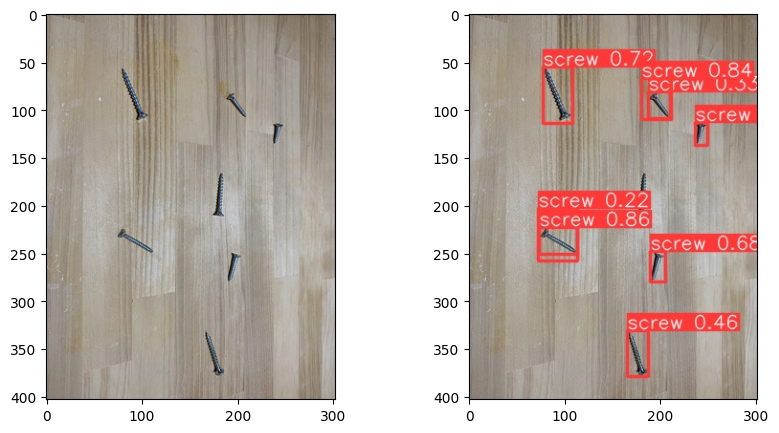

In [4]:
# 4. 検出結果を表示
import os
import matplotlib.pyplot as plt
import cv2
import random

_sources = glob.glob('/content/20230708_screw/images/test/*.jpg')
_i = random.randint(0, len(_sources)-1)
print(_i)
_basename = os.path.basename(_sources[_i])
_result_dir = '/content/drive/MyDrive/sudspg/ultralytics/runs/detect/predict-20230708-screw-dmt3-yolov8m'
_result_img = os.path.join(_result_dir, _basename)
if os.path.exists(_result_img):
  original_img = cv2.cvtColor(cv2.imread(_sources[_i]), cv2.COLOR_BGR2RGB)
  result_img = cv2.cvtColor(cv2.imread(_result_img), cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(original_img)
  plt.subplot(1, 2, 2)
  plt.imshow(result_img)